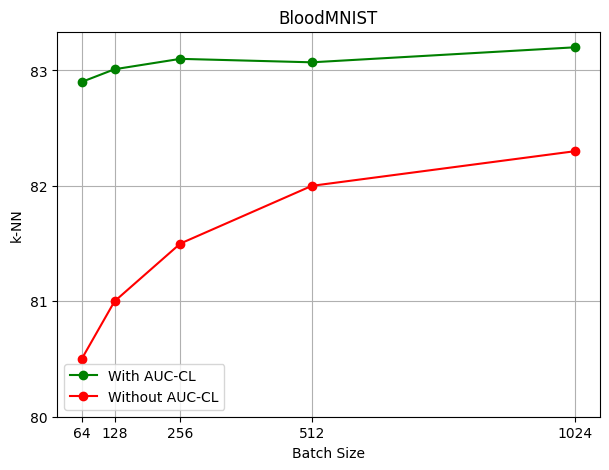

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Data: Batch sizes and corresponding accuracies for "Ours" and "MoCo-v3"
batch_sizes = np.array([64, 128, 256, 512, 1024])
accuracy_ours = np.array([82.9, 83.01, 83.1, 83.07, 83.2])
accuracy_moco_v3 = np.array([80.5, 81.0, 81.5, 82.0, 82.3])

# Create the plot
plt.figure(figsize=(7, 5))
plt.plot(batch_sizes, accuracy_ours, 'g-o', label='With AUC-CL')
plt.plot(batch_sizes, accuracy_moco_v3, 'r-o', label='Without AUC-CL')
plt.xlabel('Batch Size')
plt.ylabel('k-NN')
plt.title('BloodMNIST')
plt.xticks(batch_sizes)  # Set x-tick labels to match batch sizes
plt.yticks(range(80, 84))  # Set y-tick labels from 90 to 93
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('accuracy_comparison.png')
plt.show()


In [31]:
#import libraries
import numpy as np
import medmnist.dataset
from tsimcne.imagedistortions import *
from tsimcne.tsimcne import TSimCNE
from tsimcne.evaluation.eval import knn_acc,silhouette_score_
from torch.utils.data import ConcatDataset
from matplotlib import pyplot as plt
import torch
#load the data
root='datasets'
dataset_train = medmnist.dataset.BloodMNIST(root=root, split='train', transform=None,target_transform=None, download=True)
dataset_test = medmnist.dataset.BloodMNIST(root=root, split='test', transform=None, target_transform=None, download=True)
dataset_val = medmnist.dataset.BloodMNIST(root=root, split='val', transform=None, target_transform=None, download=True)
dataset_full = [dataset_train, dataset_test,dataset_val]

for dataset in dataset_full:
        dataset.labels = dataset.labels.squeeze()
dataset_full_ = ConcatDataset(dataset_full)

labels = np.array([lbl for img, lbl in dataset_full_])


batch_size=1024
total_epochs=[10,2,5]

# You can also define your custom augmentations by passing a 'data_transform' parameter.
# For more details check scripts/mnist.py or 
# read the documentation here [https://t-simcne.readthedocs.io/]  
torch.autograd.set_detect_anomaly(True)
tsimcne = TSimCNE(batch_size=batch_size, total_epochs=total_epochs) 
Y = tsimcne.fit_transform(dataset_full_)

#get the metrics
kNN_score=knn_acc(Y,labels)
sil_score=silhouette_score_(Y,labels)

#visualise the results
fig, ax = plt.subplots()
ax.scatter(*Y.T, c=labels, s=1)
ax.set_title(f"$k$NN acc. = {kNN_score}% sil score = {sil_score}")
fig.savefig("tsimcne_bloodmnist_hardneg.png")

Using downloaded and verified file: datasets/bloodmnist.npz
Using downloaded and verified file: datasets/bloodmnist.npz
Using downloaded and verified file: datasets/bloodmnist.npz
HARD NEGATIVE LOSS


 10%|█▊                | 1/10 [00:07<01:04,  7.17s/epoch, lr=0.0133, loss=-6.88]

Using downloaded and verified file: datasets/dermamnist.npz
Using downloaded and verified file: datasets/dermamnist.npz
Using downloaded and verified file: datasets/dermamnist.npz


100%|██████████████████████| 5/5 [00:19<00:00,  3.88s/epoch, lr=3.33e-5, loss=6]


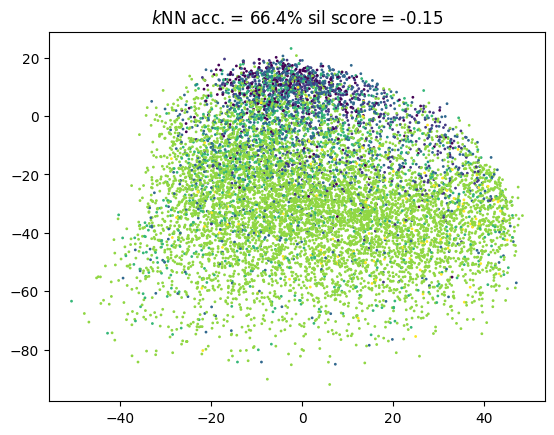

In [ ]:
#import libraries
import numpy as np
import medmnist.dataset
from tsimcne.imagedistortions import *
from tsimcne.tsimcne import TSimCNE
from tsimcne.evaluation.eval import knn_acc,silhouette_score_
from torch.utils.data import ConcatDataset
from matplotlib import pyplot as plt
#load the data
root='datasets'
dataset_train = medmnist.dataset.DermaMNIST(root=root, split='train', transform=None,target_transform=None, download=True)
dataset_test = medmnist.dataset.DermaMNIST(root=root, split='test', transform=None, target_transform=None, download=True)
dataset_val = medmnist.dataset.DermaMNIST(root=root, split='val', transform=None, target_transform=None, download=True)
dataset_full = [dataset_train, dataset_test,dataset_val]

for dataset in dataset_full:
        dataset.labels = dataset.labels.squeeze()
dataset_full_ = ConcatDataset(dataset_full)

labels = np.array([lbl for img, lbl in dataset_full_])


batch_size=512
total_epochs=[10,2,5]

# You can also define your custom augmentations by passing a 'data_transform' parameter.
# For more details check scripts/mnist.py or 
# read the documentation here [https://t-simcne.readthedocs.io/]  
tsimcne = TSimCNE(batch_size=batch_size, total_epochs=total_epochs) 
Y = tsimcne.fit_transform(dataset_full_)

#get the metrics
kNN_score=knn_acc(Y,labels)
sil_score=silhouette_score_(Y,labels)

#visualise the results
fig, ax = plt.subplots()
ax.scatter(*Y.T, c=labels, s=1)
ax.set_title(f"$k$NN acc. = {kNN_score}% sil score = {sil_score}")
fig.savefig("DermaMNIST.png")

images = []
for img, lbl in dataset_full_:
    images.append(img)  # Convert PyTorch tensor to numpy array if needed

images = np.array(images)
npz = np.savez('numpy_files/dermamnist_all_hardneg.npz', embeddings=Y, labels=labels, images=images)

In [ ]:
images = []
for img, lbl in dataset_full_:
    images.append(img)  # Convert PyTorch tensor to numpy array if needed
images = np.array(images)
npz_images = np.savez('numpy_files/bloodmnist_bad_all.npz', embeddings=Y, labels=labels, images=images)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the .dat file
with open('datasets/leukemia_labels.dat', 'r') as file:
    lines = file.readlines()

# Process lines and create a DataFrame
data = []
for line in lines:
    parts = line.strip().split()
    img_path = parts[0]
    label1 = parts[1]
    label2 = parts[2]
    label3 = parts[3]
    # Choose how you want to handle multiple labels
    # For example, use label1 as the primary label or combine them
    primary_label = label1
    data.append([img_path, primary_label])

# Create a DataFrame
df = pd.DataFrame(data, columns=['img', 'labels'])

# Encode labels to numeric values
label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['labels'])

# Save to CSV
df.to_csv('datasets/leukemia_labels.csv', index=False)

# Optionally, save the label encoding for future use
# label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_) + 1))
# pd.DataFrame(list(label_mapping.items()), columns=['Label', 'Encoded']).to_csv('label_encoding_mapping.csv', index=False)

# print("Label encoding mapping:")
# print(label_mapping)


In [ ]:
npz = np.savez('numpy_files/bloodmnist_bad.npz', preds=Y)

In [ ]:
labels_ = np.save('numpy_files/bloodmnist_labels.npy', labels)

In [ ]:
Y_ = np.load("numpy_files/bloodmnist_bad.npz")

In [ ]:
Y_['preds'].shape

(17092, 2)

In [ ]:
images = []
labels = []

In [ ]:
for img, lbl in dataset_full_:
    images.append(img)  # Convert PyTorch tensor to numpy array if needed
    labels.append(lbl)

# Convert lists to numpy arrays for easier manipulation
images = np.array(images)
labels = np.array(labels)

In [ ]:
np.savez('numpy_files/bloodmnist_bad.npz', embeddings=Y, labels=labels, images=images)

100%|███████████████████| 5/5 [00:47<00:00,  9.50s/epoch, lr=6.67e-5, loss=6.41]


kNN_score: 67.0
Silhouette score: -0.011


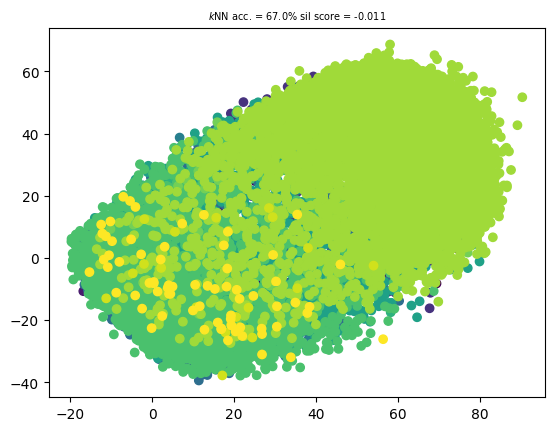

In [ ]:
import os
from PIL import Image
import pandas as pd
class Leukemia(Dataset):
    def __init__(self, csv_file, image_folder, transform=None):
        self.data = pd.read_csv(csv_file)
        self.image_folder = image_folder
        self.transform = transform
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image_aml = os.path.join(self.image_folder, self.data.iloc[idx]['img'])
        label = self.data.iloc[idx]['labels']
        
        image = Image.open(image_aml).convert("RGB").resize((28,28))
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

csv_file = 'datasets/leukemia_labels.csv'
image_folder = 'datasets/AML-Cytomorphology_LMU/'

batch_size=1024
total_epochs=[10,2,5]
dataset = Leukemia(csv_file, image_folder, transform=None)
labels = np.array([lbl for img, lbl in dataset])
tsimcne = TSimCNE(batch_size=batch_size,
                   total_epochs=total_epochs,
                   )


Y = tsimcne.fit_transform(dataset)

kNN_score=knn_acc(Y,labels)
sil_score=silhouette_score_(Y,labels)
print(f"kNN_score: {kNN_score}")
print(f"Silhouette score: {sil_score}")

fig, ax = plt.subplots()
ax.scatter(*Y.T, c=labels)
ax.set_title(f"$k$NN acc. = {kNN_score}% sil score = {sil_score}", fontsize=7)
fig.savefig("figures/leukemia.png")

In [ ]:
images = []
for img, lbl in dataset:
    images.append(img)  # Convert PyTorch tensor to numpy array if needed
images = np.array(images)

npz_images = np.savez('numpy_files/leukemia_all.npz', embeddings=Y, labels=labels, images=images)